Based on a post @ [Towards Data Science](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476).

> "The biggest challenge in machine learning is selecting the best features to train the model. We need only the features which are highly dependent on the response variable. But what if the response variable is continuous and the predictor is categorical?"
>> "ANOVA (<u>AN</u>alysis <u>O</u>f <u>VA</u>riance) helps us to complete our job of selecting the best features."

## Impact of Variance

> "\[M\]easurement of the spread between numbers in a variable."
>> "The variance of a feature determines how much it is impacting the response variable. If the variance is low, it implies there is no impact of this feature on response and vice-versa."

## F-Distribution

> "A probability distribution generally used for the analysis of variance."

Hypotheses:

$$
\begin{align}
H_0 : & \text{ Two variances are equal.} \\
H_1 : & \text{ Two variances are NOT equal.}
\end{align}
$$

More on the F-distribution [here](https://en.wikipedia.org/wiki/F-distribution).

#### Degrees of Freedom

> "Degrees of freedom refers to the maximum number of logically independent values, which have the freedom to vary."
>> "In simple words, it can be defined as the total number of observations minus the number of independent constraints imposed on the observations."

$$
\textrm{df } = N - 1
$$

where $N$ is the number of observations (sample size).

#### F-value
 > The ratio of two [chi-squared distributed](https://en.wikipedia.org/wiki/Chi-squared_distribution) variates, each one divided by its respective degrees of freedom.
 
$$
X \sim F(x ; d_1, d_2) : X = \displaystyle\frac{\displaystyle\frac{U_1}{d_1}}{\displaystyle\frac{U_2}{d_2}}
$$

where $U_1 \sim \chi^2(d_1)$ and $U_2 \sim \chi^2(d_2)$.

- $d_1 = n_1 - 1$ and $d_2 = n_2 - 1$, where $n_i$ is the sample size.

##### Explanation:

We know the chi-square test statistic is given by $\chi^2 = (n-1) \displaystyle\frac{S^2}{\sigma^2}$ (see `chi-square-test.pdf`), where $n$ is the sample size, $S^2$ is the <u>sample</u> variance and $\sigma^2$ is the <u>distribution</u> variance.

Substituting that into the F-value formula, we obtain $F = \displaystyle\frac{S_1^2}{\sigma_1^2} \cdot \displaystyle\frac{\sigma_2^2}{S_2^2}$.

If $H_0$ is true (that is, $\sigma_1^2 = \sigma_2^2$), then $F = \displaystyle\frac{S_1^2}{S_2^2}$.

## ANOVA

> "\[U\]sed to check the means of two or more groups that are significantly different from each other."

For $k$ groups:

$$
\begin{align}
H_0 : & \mu_1 = \mu_2 = ... = \mu_k \\
H_1 : & \exists\ \mu_i, \mu_j : \mu_i \neq \mu_j \quad \big( i,j \leq k,\ i \neq j \big)
\end{align}
$$

How comparison of means trelates to the comparison of variance?

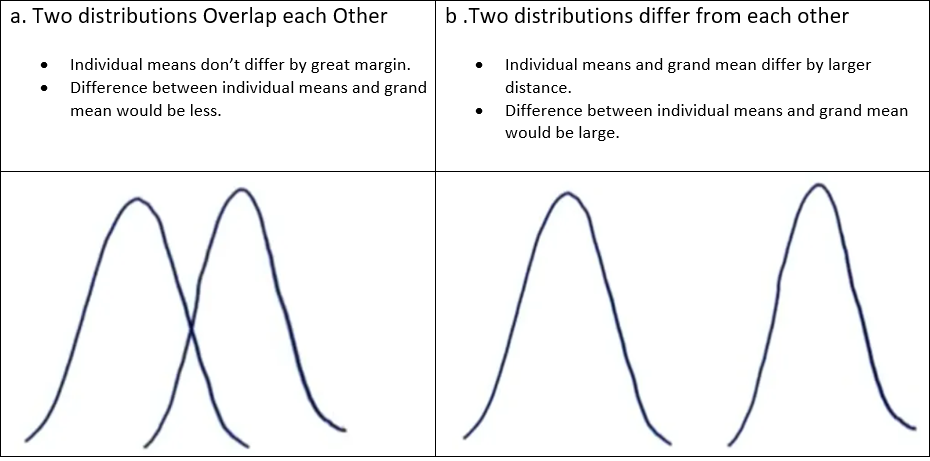

In [17]:
from IPython.display import Image
Image('./means-comparison.png')

> We can say that if the groups are close or overlap, the group (sample) means will be similar to the hypothesized (distribution) mean.

> Otherwise, the distribution and the group means will differ largely.

>> "Thus, in ANOVA, we will compare between-group variability to within-group variability."

>> "ANOVA uses an F-test to check if there is any significant difference between the groups. If there is no significant difference between thems (and all variances are seemingly equal), the result of ANOVA’s F-ratio will be close to 1."

### One-Way ANOVA (with example)

1. "One Way ANOVA tests the relationship between categorical predictor vs continuous response."
2. "Here we will check whether there is equal variance between groups of categorical feature w.r.t. continuous response".
3. "If there is equal variance between groups, it means this feature has no impact on response and it can not be considered for model training."

> "By using One Way ANOVA let us determine is there any impact of the guardian on the final grade."

- Guardian: columns (`father`, `mother` or `other`).
- Grades: rows.

In [2]:
import pandas as pd

In [3]:
grades = pd.read_csv('final-grades.csv')

In [4]:
grades.head()

,father,mother,other
0,8,25,5
1,0,1,0
2,1,6,0
3,4,11,0
4,1,7,1


#### Steps to perform one-way ANOVA

1. Define hypotheses.
2. Calculate the sum of squares.
3. Determine degrees of freedom.
4. Compute F-value.
5. Accept or reject the null hypothesis.


##### Define hypotheses:

$$
\begin{align}
H_0 : & S_{\textrm{father}}^2 = S_{\textrm{mother}}^2 = S_{\textrm{other}}^2 \\
H_1 : & S_{\textrm{father}}^2 \neq S_{\textrm{mother}}^2 \vee S_{\textrm{father}}^2 \neq S_{\textrm{other}}^2 \vee S_{\textrm{mother}}^2 \neq S_{\textrm{other}}^2
\end{align}
$$

##### Calculate sum of squares:

"The sum of squares is the statistical technique used to determine the dispersion in data points."

For a a given variable $X = \{x_i\}$, the sum of squares is given by:

$$
SS = \displaystyle\sum_i (x_i - \bar x)^2 ,
$$

where $x_i$ is the $i$-th observation and $\bar x$ is the average value.

- Total sum of squares: The sum of the distances between each observed point $x_i$ from the grand mean $\bar x$.

$$
SS_{\textrm{total}} = \displaystyle\sum_i (x_i - \bar x)^2
$$

- Sum of squares between groups: The sum of the distances between each group average value $\bar x_{j}\ (j \leq k)$ from grand means $\bar x$ times the number of observations in each group $n_j$ (check [this link](https://en.wikipedia.org/wiki/F-test#Multiple-comparison_ANOVA_problems)).

$$
SS_{\textrm{between}} = \displaystyle\sum_j n_j (\bar x_j - \bar x)^2
$$

- Sum of squares within groups: The sum of the distances between each observed value within the group $x_{ij}$ from the group mean $\bar x_{j}$.

$$
SS_{\textrm{within}} = \displaystyle\sum_i (x_{ij} - \bar x_j)^2
$$

It holds that:

$$
SS_{\textrm{total}} = SS_{\textrm{between}} + SS_{\textrm{within}}
$$

##### Determine degrees of freedom:

1. The degrees of freedom between groups is given by $\textrm{df}_{\textrm{between}} = k - 1$, remembering that $k$ is the number of groups.

2. The degrees of freedom within groups is given by $\textrm{df}_{\textrm{within}} = \displaystyle\sum_j (n_j - 1)$, where $n_j$ is the number of observations in group $j$.

##### Compute F-value:

"Since we are comparing the variance between the groups and variance within the groups, the F value is given as":

$$
F = \displaystyle\frac{SS_{\textrm{between}}}{\textrm{df}_{\textrm{between}}} \cdot \frac{\textrm{df}_{\textrm{within}}}{SS_{\textrm{within}}}
$$

In [5]:
means_per_group = grades.mean()
nobs_per_group = grades.apply(len)

In [6]:
ss_between = nobs_per_group.dot((means_per_group - means_per_group.mean())**2)
ss_within = ((grades - means_per_group)**2).sum().sum()

In [7]:
df_within = sum(nobs_per_group) - len(nobs_per_group)
df_between = len(nobs_per_group) - 1

In [8]:
F_stat = (ss_between/df_between) / (ss_within/df_within)
F_stat

18.49716905444126

##### Accept or reject the null hypothesis:

For a significance level $\alpha$ and the degrees of freedom $\textrm{df}_{\textrm{between}}$ and $\textrm{df}_{\textrm{within}}$, the critical value for the test is given by: $F_{\textrm{critical}} = Q(1-\alpha;\ \textrm{df}_{\textrm{between}}, \textrm{df}_{\textrm{within}})$, where $Q(p)$ is the percent-point (or [quantile](https://en.wikipedia.org/wiki/Quantile_function)) function, the inverse of the cumulative distribution function.

- A calculator of critical values for various distributions can be found [here](https://www.socscistatistics.com/tests/criticalvalues/default.aspx).
- For more on `scipy.stats.f`. see [this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html).

If the test statistic is greater than the critical value ($F > F_{\textrm{critical}}$), the null hypothesis should be rejected.

In [9]:
from scipy.stats import f

In [10]:
alpha = 0.05

In [11]:
F_crit = f.ppf(q=(1-alpha), dfn=df_between, dfd=df_within)

In [12]:
if F_stat > F_crit:
    print('REJECT H0!')
else:
    print('Failed to reject H0.')

REJECT H0!


Illustrating...

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
plt.style.use('ggplot')

In [15]:
xs = np.linspace(1e-6, 15, 100)
probs = f.pdf(x=xs, dfn=df_between, dfd=df_within)

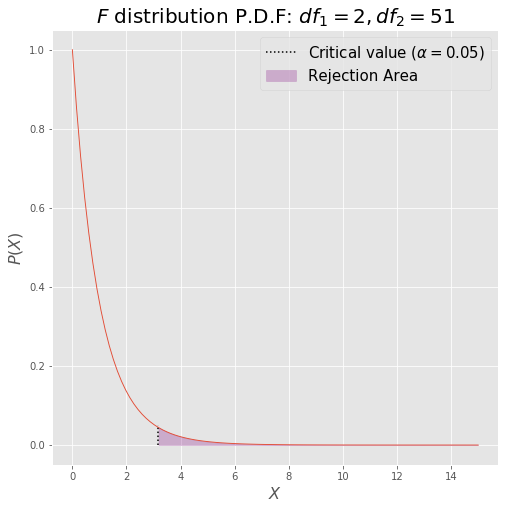

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_title(r'$F$ distribution P.D.F: $df_1 = {}, df_2 = {}$'.format(df_between, df_within),
             fontsize=20)

ax.plot(xs, probs, linewidth=0.9)

ax.vlines(x=F_crit,
          ymin = 0.0,
          ymax=alpha,
          linestyle='dotted', label=r'Critical value ($\alpha = {}$)'.format(alpha))

ax.fill_between(x=xs[xs > F_crit],
                y1=np.zeros_like(xs[xs > F_crit]),
                y2=probs[xs > F_crit],
                alpha=0.25, color='purple', label='Rejection Area')

ax.set_xlabel(r'$X$', fontsize=16)
ax.set_ylabel(r'$P(X)$', fontsize=16)
ax.legend(prop={'size': 15})

plt.show()

> "**\[A\]s the null hypothesis is rejected that means variance exists between the groups which state that there is an impact of the guardian on student final score. So we will include this feature for model training**."

> "Using one-way ANOVA, we can check only a single predictor (in the example, guardian) *vs.* the target variable (grades) and determine the relationship, but what if you have two predictors?"

>> "We will use [two-way ANOVA](https://en.wikipedia.org/wiki/Two-way_analysis_of_variance), and if there are more than two features we will go for multi-factor ANOVA."

>> "Using two-way or multi-factor ANOVA we can check the relationship on a response like":
1. Does the guardian affect the student's final grade?
2. Do the student's activities impact their final grade?
2. Do the student's guardian AND activities impact the final grade?